In [1]:
import pandas as pd
import sys
import os
from functools import reduce
import glob2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
food_security = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/Cleaned Datasets/cleaned_fa_data.csv')

#Drop unnamed column
food_security = food_security.drop('Unnamed: 0', axis=1)

#Replace state abbreviations with state names
states = {'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NA': 'National',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
    }
food_security = food_security.replace({'State': states})

#We want to focus on only a few of these columns so we'll subset this dataframe with just the columns we want
food_security = food_security[['State','Food Insecurity Rate','Child food insecurity rate', 'Year']]

#And having just re-reviewed the original data, I just realized that we have SO many rows because this data was broken down by county. So, we'll want to take an average of the rate columns for each state for each year.
#[For some reason, the Child food insecurity rate column was coming up as an object type instead of a float, so we have to deal with that first]
food_security['Child food insecurity rate'] = pd.to_numeric(food_security['Child food insecurity rate'], errors='coerce')
#Now we can groupby and agg
food_security = food_security.groupby(['State','Year']).agg({'Food Insecurity Rate':'mean','Child food insecurity rate':'mean'})

#Reset index so we can merge later
food_security = food_security.reset_index()

#Save our changes
food_security.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/food_security.csv')


In [3]:
dropout_rates = pd.read_excel('/Users/kayh/Documents/DS4A/Working_Data/Teens ages 16 to 19 not in school and not high school graduates.xlsx')

#Rename Headers
dropout_rates = dropout_rates.rename(columns = {'Location':'State','TimeFrame':'Year','Data':'Dropouts'})

#Remove Percents rows & then drop the DataFormat column
dropout_rates = dropout_rates[~dropout_rates['DataFormat'].str.contains('Percent')]
dropout_rates=dropout_rates.drop('DataFormat',axis=1)

#Remove Territories/Nation rows & then remove the LocationType column
drop_these = ['Territory','Nation']
dropout_rates = dropout_rates[~dropout_rates['LocationType'].isin(drop_these)]
dropout_rates = dropout_rates.drop('LocationType', axis=1).reset_index(drop=True)

#We certainly don't need ALL the years available in this data, so we can drop any rows with the year below 2009
dropout_rates.drop(dropout_rates[dropout_rates['Year'] < 2009].index, inplace = True) 

#Save our changes
dropout_rates.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/dropoutrates.csv')

In [4]:
#This data was previously found & cleaned by team member: Kaylynne
#Additional data cleaning & exploratory analysis by team member: Claudia
state_fund = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/Isolated_Metrics/state_funding.csv')

#Drop unnamed column
state_fund = state_fund.drop('Unnamed: 0', axis=1)

#Replace STATE Fips with State names
fips_states = {2: 'Alaska',
    1: 'Alabama',
    3: 'American Samoa',
    5: 'Arkansas',
    4: 'Arizona',
    6: 'California',
    7: 'Canal Zone',
    8: 'Colorado',
    9: 'Connecticut',
    11: 'District of Columbia',
    10: 'Delaware',
    12: 'Florida',
    13: 'Georgia',
    14: 'Guam',
    15: 'Hawaii',
    19: 'Iowa',
    16: 'Idaho',
    17: 'Illinois',
    18: 'Indiana',
    20: 'Kansas',
    21: 'Kentucky',
    22: 'Louisiana',
    25: 'Massachusetts',
    24: 'Maryland',
    23: 'Maine',
    26: 'Michigan',
    27: 'Minnesota',
    29: 'Missouri',
    28: 'Mississippi',
    30: 'Montana',
    37: 'North Carolina',
    38: 'North Dakota',
    31: 'Nebraska',
    33: 'New Hampshire',
    34: 'New Jersey',
    35: 'New Mexico',
    32: 'Nevada',
    36: 'New York',
    39: 'Ohio',
    40: 'Oklahoma',
    41: 'Oregon',
    42: 'Pennsylvania',
    44: 'Rhode Island',
    43: 'Puerto Rico',
    45: 'South Carolina',
    46: 'South Dakota',
    47: 'Tennessee',
    48: 'Texas',
    49: 'Utah',
    51: 'Virginia',
    50: 'Vermont',
    53: 'Washington',
    55: 'Wisconsin',
    54: 'West Virginia',
    56: 'Wyoming'
    }

state_fund = state_fund.replace({'STATE': fips_states})

#Drop STATE rows that are territories
state_fund = state_fund[~state_fund['STATE'].str.contains('American Samoa')]
state_fund = state_fund[~state_fund['STATE'].str.contains('Canal Zone')]
state_fund = state_fund[~state_fund['STATE'].str.contains('Guam')]
state_fund = state_fund[~state_fund['STATE'].str.contains('Puerto Rico')]

#Replace Year of Data with full YYYY
years = {9:2009, 10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 17:2017}
state_fund = state_fund.replace({'Year of Data': years})

#Replace Header Names
state_fund = state_fund.rename(columns = {'STATE':'State','Year of Data':'Year','Total Revenue from State Sources':'Total State Revenue'})

#Looks like this is another dataset that was broken down by county. I'm assuming the data for each county makes up the total of the state's revenue, I'm going to sum instead of average
#We'll group by state and year and sum the revenue column
state_fund = state_fund.groupby(['State','Year']).agg({'Total State Revenue':'sum'})

#Reset index so we can merge later
state_fund = state_fund.reset_index()

#Save our changes
state_fund.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/statefund.csv')

In [5]:
#This data was previously found & cleaned by team member: Kaylynne
#Additional data cleaning & exploratory analysis by team member: Shayla

fed_fund = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/Isolated_Metrics/fed_funding.csv')

#Drop unnamed column
fed_fund = fed_fund.drop('Unnamed: 0', axis=1)

#Replace STATE Fips with State names
fips_states = {2: 'Alaska',
    1: 'Alabama',
    3: 'American Samoa',
    5: 'Arkansas',
    4: 'Arizona',
    6: 'California',
    7: 'Canal Zone',
    8: 'Colorado',
    9: 'Connecticut',
    11: 'District of Columbia',
    10: 'Delaware',
    12: 'Florida',
    13: 'Georgia',
    14: 'Guam',
    15: 'Hawaii',
    19: 'Iowa',
    16: 'Idaho',
    17: 'Illinois',
    18: 'Indiana',
    20: 'Kansas',
    21: 'Kentucky',
    22: 'Louisiana',
    25: 'Massachusetts',
    24: 'Maryland',
    23: 'Maine',
    26: 'Michigan',
    27: 'Minnesota',
    29: 'Missouri',
    28: 'Mississippi',
    30: 'Montana',
    37: 'North Carolina',
    38: 'North Dakota',
    31: 'Nebraska',
    33: 'New Hampshire',
    34: 'New Jersey',
    35: 'New Mexico',
    32: 'Nevada',
    36: 'New York',
    39: 'Ohio',
    40: 'Oklahoma',
    41: 'Oregon',
    42: 'Pennsylvania',
    44: 'Rhode Island',
    43: 'Puerto Rico',
    45: 'South Carolina',
    46: 'South Dakota',
    47: 'Tennessee',
    48: 'Texas',
    49: 'Utah',
    51: 'Virginia',
    50: 'Vermont',
    53: 'Washington',
    55: 'Wisconsin',
    54: 'West Virginia',
    56: 'Wyoming'
    }

fed_fund = fed_fund.replace({'STATE': fips_states})

#Drop STATE rows that are territories
fed_fund = fed_fund[~fed_fund['STATE'].str.contains('American Samoa')]
fed_fund = fed_fund[~fed_fund['STATE'].str.contains('Canal Zone')]
fed_fund = fed_fund[~fed_fund['STATE'].str.contains('Guam')]
fed_fund = fed_fund[~fed_fund['STATE'].str.contains('Puerto Rico')]

#Replace Year of Data with full YYYY
years = {9:2009, 10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 17:2017}
fed_fund = fed_fund.replace({'Year of Data': years})

#Replace Header Names
fed_fund = fed_fund.rename(columns = {'STATE':'State','Year of Data':'Year','Total Revenue from Federal Sources':'Total Federal Revenue'})

#Just like the state fund dataset, this is another dataset that was broken down by county. Again, I'm assuming the data for each county makes up the total of the federal revenue, so I'm going to sum instead of average
#We'll group by state and year and sum the revenue column
fed_fund = fed_fund.groupby(['State','Year']).agg({'Total Federal Revenue':'sum'})

#Reset index so we can merge later
fed_fund = fed_fund.reset_index()

#Save our changes
fed_fund.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/fedfund.csv')


In [6]:
#This data was previously found & cleaned by team member: Claudia 
poverty = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/Cleaned Datasets/child_poverty.csv')

#Adjusting column names
poverty = poverty.rename(columns = {'Total Below Poverty Level':'Pop. Below Poverty Level','Percentage Below Poverty Level':'Percent of Pop. Below Poverty Level'})

#Drop total population column
poverty = poverty.drop('Total Population', axis=1)

#Save our changes
poverty.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/childpoverty.csv')

In [7]:
teacher_pay = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/Isolated_Metrics/teacher_salary_ests.csv')

#Drop all rows with NaN values
teacher_pay = teacher_pay.dropna()

#We're only pulling 10 years of data here so we can actually drop the first column
teacher_pay = teacher_pay.drop('2008-09', axis=1)

#Since we're running all these datasets up against each other - we need to make all the dates the same YYYY format
teacher_pay = teacher_pay.rename(columns = {'2009-10':'2009','2010-11':'2010','2011-12':'2011','2012-13':'2012','2013-14':'2013','2014-15':'2014','2015-16':'2015','2016-17':'2016','2017-18':'2017','2018-19':'2018'})

#We can drop the first row since that row is just totals (and Data Studio isn't a fan)
teacher_pay = teacher_pay.iloc[1:]

#And we need to add DC's name back into the State column because that's missing
teacher_pay.loc[[11],'State'] = 'District of Columbia'

#Melt the data frame so that the Years are in a column
teacher_pay = pd.melt(teacher_pay, id_vars='State', var_name = 'Year', value_name='Teacher Pay')

#Oops, looks like we also need to get rid of the commas in the "Teacher Pay" column so python will recognize it as an int
teacher_pay['Teacher Pay'] = teacher_pay['Teacher Pay'].str.replace(',', '')

for p in teacher_pay['Teacher Pay']:
    teacher_pay['Teacher Pay'] = teacher_pay['Teacher Pay'].astype(int)

#Save our changes
teacher_pay.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/TeacherPay.csv')

In [8]:
#This data was previously found & cleaned by team member: Claudia 
teen_employ = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/Cleaned Datasets/teen_employment.csv')

#Rename Headers for better clarification
teen_employ = teen_employ.rename(columns = {'Employed: Total':'Employed per 1k','Employed: Percentage':'% Employed','Unemployed: Total':'Unemployed per 1k', 'Unemployed: Percentage':'% Unemployed'})

#Save our changes
teen_employ.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/teen_employment.csv')

In [9]:
#This data was previously found & cleaned by team member: Shayla
teen_preg = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/ds4a81_project/Cleaned Datasets/teen_births_age_15_19.csv')

#Remove Unnamed: 0 column (still not sure yet where that's coming from)
teen_preg = teen_preg.drop('Unnamed: 0', axis=1)

#We can also drop the "Age Group (Years)" column -- We'll have to be sure to specify it on the presentation/dashboard that this data is specifically looking at students 15-19 years of age.
teen_preg = teen_preg.drop('Age Group (Years)', axis=1)

#Another column we can drop is the "Unit" column. We can note that the rates are per 1k either in the dataframe or in footnotes.
teen_preg = teen_preg.drop('Unit', axis=1)

#There are some rows in the 'State' column that are 'Total U.S.' we'll also get rid of those
teen_preg.drop(teen_preg[teen_preg['State'] == 'Total U.S.'].index, inplace = True) 

#We need to make sure the columns are named clearly so the data doesn't get lost when we merge everything
teen_preg = teen_preg.rename(columns = {'State Rate':'Teen Preg. Rate (State)', 'State Births':'# Teen Births (State)','U.S. Births':'# Teen Births (US)'})

#Save our changes
teen_preg.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/teen_pregnancy.csv')

In [10]:
#Data Via: Data Source: U.S. Department of Education, National Center for Education Statistics, Common Core of Data (CCD), "State Nonfiscal Public Elementary/Secondary Education Survey", 2016-17 v.1a.

#This data was cleaned in the code/cleaned_student_teacher_ratios.ipynb doc so we just need to bring it in.abs

all_StuTeach = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/Student_Teacher_Ratios.csv')

#Remove Unnamed: 0 column (not sure yet where that's coming from)
all_StuTeach = all_StuTeach.drop('Unnamed: 0', axis=1)

#Looks like this dataset also includes data for Dept. of Defense schools. We don't need that data
all_StuTeach.drop(all_StuTeach[all_StuTeach['State'] == 'Dodds (Domestic)'].index, inplace = True)
all_StuTeach.drop(all_StuTeach[all_StuTeach['State'] == 'Dodds (Overseas)'].index, inplace = True) 

#Rename Ratio column for clarification AND rename DC so that the "Of" is lowercase
all_StuTeach = all_StuTeach.rename(columns={'Ratio':'Student/Teacher Ratio'})
all_StuTeach['State'] = all_StuTeach['State'].replace({'District Of Columbia':'District of Columbia'})

#Save our changes
all_StuTeach.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/Student_Teacher_Ratios.csv')

all_StuTeach['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [11]:
parent_edu = pd.read_csv('/Users/kayh/Documents/DS4A/team_81_project/Isolated_Metrics/parent_edu_attain.csv')

#Replace state abbreviations with state names
states = {'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NA': 'National',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
    }
parent_edu = parent_edu.replace({'State': states})

#Remove excess rows and NaNs
parent_edu = parent_edu.dropna()
parent_edu = parent_edu[~parent_edu['State'].str.contains('Total US')]
parent_edu = parent_edu[~parent_edu['Educational Attainment'].str.contains('Children under 15')]

#Pivot the table so that the Education Attainment column becomes multiple columns
parent_edu = pd.pivot_table(parent_edu, index = ['State','Year'], columns=['Educational Attainment'], values = ['Totals'])
parent_edu.columns = [' '.join(col).strip() for col in parent_edu.columns.values]

#Rename Column Headers
parent_edu = parent_edu.rename(columns = {'Totals Bachelor\'s degree or higher':'Grdn Bachelor Degree+','Totals High school or equivalent':'Grdn HS Diploma or GED', 'Totals No high school diploma':'Grdn No HS Diploma', 'Totals Some college, less than 4-yr degree':'Grdn Some College'})

#Drop unneeded Totals column
parent_edu = parent_edu.drop('Totals Totals', axis=1)

#Reset the index
parent_edu = parent_edu.reset_index()

#Save our changes
parent_edu.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/parentedu.csv')


In [12]:
#Since the State and Year columns are two different dtypes, we need to make them match. I'm going to use a for loop to go through and change the dtypes of the 'Year' columns from int to str. 
all_dfs = [parent_edu,all_StuTeach,teen_preg,teen_employ,teacher_pay,poverty,fed_fund,state_fund,dropout_rates,food_security]

for df in all_dfs:
    df['Year'] = df['Year'].astype(str)

In [13]:
#Okay, merging everything into a single dataframe did NOT work [the kernel kept dying no matter what I tried]. So instead, since we're running everything up against the dropout rates, we'll create a series of dataframes that weigh each metric against the dropout rates. Then, maybe we can figure out a way to weigh other metrics against each other. 

In [14]:
dfs_1 = [fed_fund,state_fund]
dfs_4 = [dropout_rates,food_security]
dfs_2 = [teen_employ,teacher_pay,poverty]
dfs_3 = [parent_edu,all_StuTeach,teen_preg]

first_merge = reduce(lambda  left,right: pd.merge(left,right,on=['State','Year'], how='outer'), dfs_1)
second_merge = reduce(lambda  left,right: pd.merge(left,right,on=['State','Year'], how='outer'), dfs_2)
third_merge = reduce(lambda  left,right: pd.merge(left,right,on=['State','Year'], how='outer'), dfs_3)
fourth_merge = reduce(lambda  left,right: pd.merge(left,right,on=['State','Year'], how='outer'), dfs_4)

In [15]:
dfs_merge1 =[first_merge,second_merge]
dfs_merge2 =[third_merge,fourth_merge]

first_and_second = reduce(lambda  left,right: pd.merge(left,right,on=['State','Year'], how='outer'), dfs_merge1)
second_and_third = reduce(lambda  left,right: pd.merge(left,right,on=['State','Year'], how='outer'), dfs_merge2)

In [16]:
final_merge =[first_and_second,second_and_third]
all_data = reduce(lambda  left,right: pd.merge(left,right,on=['State','Year'], how='outer'), final_merge)

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [17]:
#Alright, well the fully merge dataframe could definitely use some additional cleaning. I'll focus on years with a lot of missing data AND...I may need to go back and look at the dropouts data because there's some funny business happening there.

#First we'll Remove any rows from 2009 since it looks like there's very little data for that year in most states.
all_data.drop(all_data[all_data['Year'] == '2009'].index, inplace = True) 

#Some of the columns have an "object" dtype (teen births, dropouts, and teacher pay). We'll have to make those integers
all_data['Dropouts'] = pd.to_numeric(all_data['Dropouts'], errors='coerce')

#And we can probably drop the Teen Births and US Birth rate columns, as well as the Unemployed column
all_data = all_data.drop('# Teen Births (State)', axis=1)
all_data = all_data.drop('# Teen Births (US)', axis=1)
all_data = all_data.drop('U.S. Birth Rate', axis=1)
all_data = all_data.drop('Unemployed per 1k', axis=1)
all_data = all_data.drop('% Unemployed', axis=1)

#NOTE TO TEAM: looks like a lot of our data stops after 2018. I know we were aiming for 10 years, but we might be limited to 2010 - 2018
all_data.sort_values(by='Year')

#Let's save this beast!
all_data.to_csv('/Users/kayh/Documents/DS4A/team_81_project/Final_Data_Code/ALL_DATA.csv')

In [18]:
all_data.dtypes

State                                   object
Year                                    object
Total Federal Revenue                  float64
Total State Revenue                    float64
Employed per 1k                        float64
% Employed                             float64
Teacher Pay                            float64
Pop. Below Poverty Level               float64
Percent of Pop. Below Poverty Level    float64
Grdn Bachelor Degree+                  float64
Grdn HS Diploma or GED                 float64
Grdn No HS Diploma                     float64
Grdn Some College                      float64
Student/Teacher Ratio                  float64
Teen Preg. Rate (State)                float64
Dropouts                               float64
Food Insecurity Rate                   float64
Child food insecurity rate             float64
dtype: object

[Text(0.5, 0, 'Total Federal Revenue'),
 Text(1.5, 0, 'Total State Revenue'),
 Text(2.5, 0, 'Employed per 1k'),
 Text(3.5, 0, '% Employed'),
 Text(4.5, 0, 'Teacher Pay'),
 Text(5.5, 0, 'Pop. Below Poverty Level'),
 Text(6.5, 0, 'Percent of Pop. Below Poverty Level'),
 Text(7.5, 0, 'Grdn Bachelor Degree+'),
 Text(8.5, 0, 'Grdn HS Diploma or GED'),
 Text(9.5, 0, 'Grdn No HS Diploma'),
 Text(10.5, 0, 'Grdn Some College'),
 Text(11.5, 0, 'Student/Teacher Ratio'),
 Text(12.5, 0, 'Teen Preg. Rate (State)'),
 Text(13.5, 0, 'Dropouts'),
 Text(14.5, 0, 'Food Insecurity Rate'),
 Text(15.5, 0, 'Child food insecurity rate')]

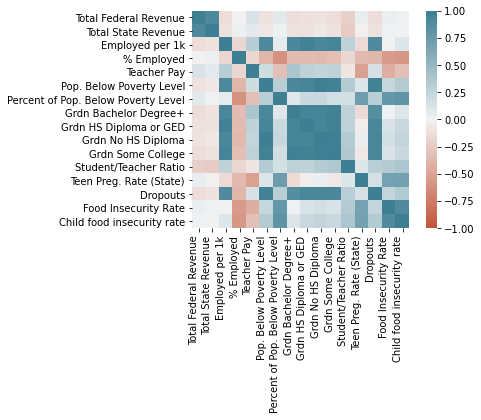

In [19]:
corr = all_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

<AxesSubplot:>

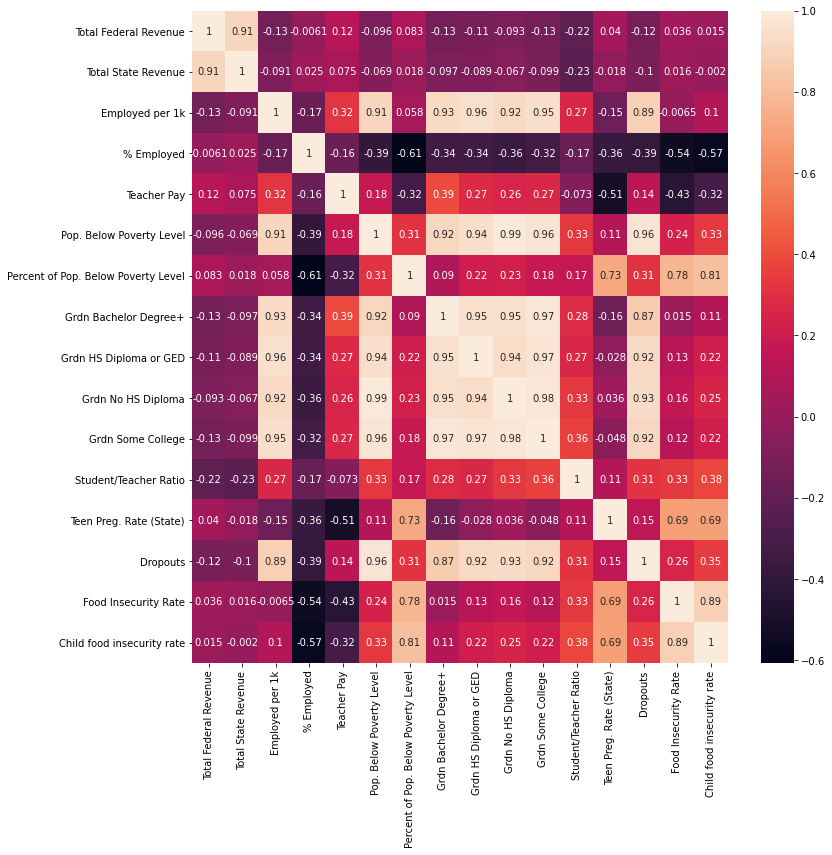

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(all_data.corr(), annot = True)
